In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering


df = pd.read_csv("USArrests.csv",sep=",",header = 0)

# 1-1 check scale by looking at variances
print("Variance \n", df.var().sort_values())
print("Mean \n", df.mean().sort_values())

Variance 
 Murder        18.970465
Rape          87.729159
UrbanPop     209.518776
Assault     6945.165714
dtype: float64
Mean 
 Murder        7.788
Rape         21.232
UrbanPop     65.540
Assault     170.760
dtype: float64


[0 0 0 2 0 2 1 0 0 2 1 1 0 1 1 1 1 0 1 0 2 0 1 0 2 1 1 0 1 2 0 0 0 1 1 2 2
 1 2 0 1 2 2 1 1 2 2 1 1 2]


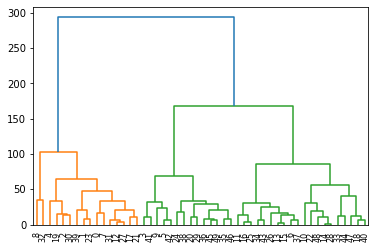

In [82]:
# 2-1 hierarchical clustering
X = df.iloc[:,1:4]

# Hierarchical Clustering by sklearn module
HClustering = AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3).fit(X)

y_HClustering = HClustering.fit_predict(X)

print(y_HClustering)

# Dendrogram – scipy module
Z = hierarchy.linkage(X, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z)
plt.xticks(rotation = 90)
plt.show()

In [39]:
cluster_states = pd.DataFrame(y_HClustering)
cluster_states = cluster_states.join(df['State'])
a=cluster_states.groupby(0)
for i, item in a:
    print(a.get_group(i), "\n\n")

    0           State
0   0         Alabama
1   0          Alaska
2   0         Arizona
4   0      California
7   0        Delaware
8   0         Florida
12  0        Illinois
17  0       Louisiana
19  0        Maryland
21  0        Michigan
23  0     Mississippi
27  0          Nevada
30  0      New Mexico
31  0        New York
32  0  North Carolina
39  0  South Carolina 


    0          State
6   1    Connecticut
10  1         Hawaii
11  1          Idaho
13  1        Indiana
14  1           Iowa
15  1         Kansas
16  1       Kentucky
18  1          Maine
22  1      Minnesota
25  1        Montana
26  1       Nebraska
28  1  New Hampshire
33  1   North Dakota
34  1           Ohio
37  1   Pennsylvania
40  1   South Dakota
43  1           Utah
44  1        Vermont
47  1  West Virginia
48  1      Wisconsin 


    0          State
3   2       Arkansas
5   2       Colorado
9   2        Georgia
20  2  Massachusetts
24  2       Missouri
29  2     New Jersey
35  2       Oklahoma
36  2      

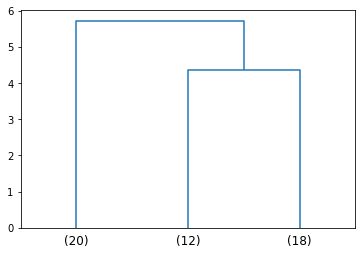

In [85]:
# 2-2 Dendrogram – scipy module
# 14 2s, 20 1s, 16 0s
plt.figure()
dn = hierarchy.dendrogram(Z, p=3, truncate_mode= 'lastp')
plt.show()



[0 0 0 0 0 1 1 1 0 0 1 2 0 1 2 1 0 0 2 0 1 0 2 0 1 2 2 0 2 1 0 0 0 2 1 1 1
 1 1 0 2 0 0 1 2 1 1 2 2 1]


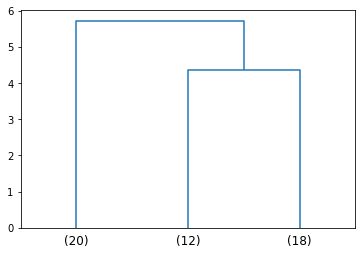

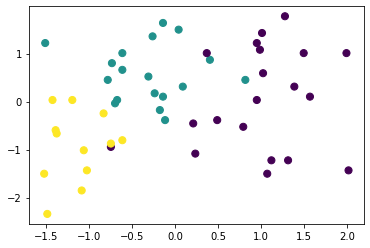

    0           State
0   0         Alabama
1   0          Alaska
2   0         Arizona
3   0        Arkansas
4   0      California
8   0         Florida
9   0         Georgia
12  0        Illinois
16  0        Kentucky
17  0       Louisiana
19  0        Maryland
21  0        Michigan
23  0     Mississippi
27  0          Nevada
30  0      New Mexico
31  0        New York
32  0  North Carolina
39  0  South Carolina
41  0       Tennessee
42  0           Texas 


    0          State
5   1       Colorado
6   1    Connecticut
7   1       Delaware
10  1         Hawaii
13  1        Indiana
15  1         Kansas
20  1  Massachusetts
24  1       Missouri
29  1     New Jersey
34  1           Ohio
35  1       Oklahoma
36  1         Oregon
37  1   Pennsylvania
38  1   Rhode Island
43  1           Utah
45  1       Virginia
46  1     Washington
49  1        Wyoming 


    0          State
11  2          Idaho
14  2           Iowa
18  2          Maine
22  2      Minnesota
25  2        Montana
26  2  

In [84]:
# 2-3
scaler = StandardScaler()  
scaler.fit(df.iloc[:,1:4])
X = scaler.transform(df.iloc[:,1:4])  


HClustering = AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3).fit(X)
y_HClustering = HClustering.fit_predict(X)
print(y_HClustering)

# Dendrogram – scipy module
Z = hierarchy.linkage(X, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z, p=3, truncate_mode='lastp')
plt.show()


plt.scatter(X[:, 1], X[:, 2], c=y_HClustering, s=50, cmap='viridis')
plt.show()

cluster_states = pd.DataFrame(y_HClustering)
cluster_states = cluster_states.join(df['State'])
a=cluster_states.groupby(0)
for i, item in a:
    print(a.get_group(i), "\n\n")

[1 1 2 1 2 0 0 0 2 1 0 0 2 0 0 0 0 1 0 2 0 2 0 1 0 0 0 2 0 0 2 2 1 0 0 0 0
 0 0 1 0 1 2 0 0 0 0 0 0 0]


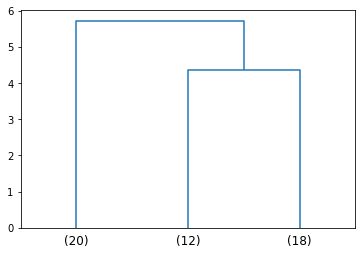

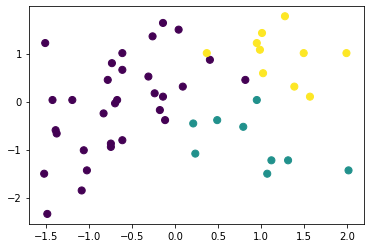

    0          State
5   0       Colorado
6   0    Connecticut
7   0       Delaware
10  0         Hawaii
11  0          Idaho
13  0        Indiana
14  0           Iowa
15  0         Kansas
16  0       Kentucky
18  0          Maine
20  0  Massachusetts
22  0      Minnesota
24  0       Missouri
25  0        Montana
26  0       Nebraska
28  0  New Hampshire
29  0     New Jersey
33  0   North Dakota
34  0           Ohio
35  0       Oklahoma
36  0         Oregon
37  0   Pennsylvania
38  0   Rhode Island
40  0   South Dakota
43  0           Utah
44  0        Vermont
45  0       Virginia
46  0     Washington
47  0  West Virginia
48  0      Wisconsin
49  0        Wyoming 


    0           State
0   1         Alabama
1   1          Alaska
3   1        Arkansas
9   1         Georgia
17  1       Louisiana
23  1     Mississippi
32  1  North Carolina
39  1  South Carolina
41  1       Tennessee 


    0       State
2   2     Arizona
4   2  California
8   2     Florida
12  2    Illinois
19  2    Mar

In [87]:
# 2-5
scaler = StandardScaler()  
scaler.fit(df.iloc[:,1:4])
X = scaler.transform(df.iloc[:,1:4])  


HClustering = AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3).fit(X)
y_HClustering = HClustering.fit_predict(X)
print(y_HClustering)

# Dendrogram – scipy module
Z = hierarchy.linkage(X, 'complete')
plt.figure()
dn = hierarchy.dendrogram(Z, p=3, truncate_mode='lastp')
plt.show()


plt.scatter(X[:, 1], X[:, 2], c=y_HClustering, s=50, cmap='viridis')
plt.show()

cluster_states = pd.DataFrame(y_HClustering)
cluster_states = cluster_states.join(df['State'])
a=cluster_states.groupby(0)
for i, item in a:
    print(a.get_group(i), "\n\n")

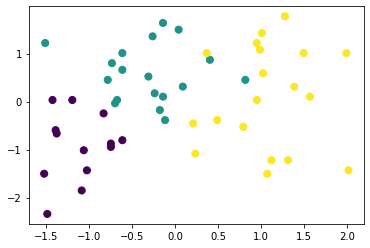

    0          State
11  0          Idaho
14  0           Iowa
16  0       Kentucky
18  0          Maine
22  0      Minnesota
25  0        Montana
26  0       Nebraska
28  0  New Hampshire
33  0   North Dakota
40  0   South Dakota
44  0        Vermont
47  0  West Virginia
48  0      Wisconsin 


    0          State
5   1       Colorado
6   1    Connecticut
7   1       Delaware
10  1         Hawaii
13  1        Indiana
15  1         Kansas
20  1  Massachusetts
24  1       Missouri
29  1     New Jersey
34  1           Ohio
35  1       Oklahoma
36  1         Oregon
37  1   Pennsylvania
38  1   Rhode Island
43  1           Utah
45  1       Virginia
46  1     Washington
49  1        Wyoming 


    0           State
0   2         Alabama
1   2          Alaska
2   2         Arizona
3   2        Arkansas
4   2      California
8   2         Florida
9   2         Georgia
12  2        Illinois
17  2       Louisiana
19  2        Maryland
21  2        Michigan
23  2     Mississippi
27  2          

In [88]:
# 3-1
scaler = StandardScaler()  
scaler.fit(df.iloc[:,1:4])
X = scaler.transform(df.iloc[:,1:4])  
noCluster = 3

y_true = df.iloc[:,2]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 1], X[:, 2], c=y_kmeans, s=50, cmap='viridis')
plt.show()

cluster_states1 = pd.DataFrame(y_kmeans)
cluster_states1 = cluster_states1.join(df['State'])
a=cluster_states1.groupby(0)
for i, item in a:
    print(a.get_group(i), "\n\n")

print(metrics.confusion_matrix(y_true, y_kmeans))

print("silhouette_score for "+str(noCluster)+" clusters:"+str(metrics.silhouette_score(X, y_kmeans)))


centers = kmeans.cluster_centers_
wss=0
bss=0
X_mean = X.mean(axis=0) ## overall average
for i in range(0,noCluster):
    dis= X[y_kmeans==i,:]-centers[i,:]
    sse=sum(pow(dis,2))
    n= sum(y_kmeans==i)
    ssBetween= n*pow(centers[i,:]-X_mean,2)
    wss=wss+sse
    bss= bss+ssBetween
    print("SS of Cluster "+str(i)+": "+str(sum(sse))+" , SS Between Clusters: "+str(sum(ssBetween))+", No of Obs: "+str(n) )

print("WSS: "+str(sum(wss)))
print("BSS: "+str(sum(bss)))
print("Pseudo F: "+str( sum(bss)*( len(df) - noCluster )/( sum(wss)*(noCluster-1) ) ))
